### The goal of this notebook is to display photos
(In whatever form)

Of 100 mergers from TNG100.

Since there are available images at z = 0.05, this could be a good place to search.

Since there isn't a next progenitor pointer in the normal snapshot files, you'll have to use the merger trees.
And it would be great if you could use the same architecture as TNG50 so that it could transfer over better.



In [28]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"3b865713af85f5da0dba3b577e289484"}
def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [29]:
r = get(baseUrl)
names = [sim['name'] for sim in r['simulations']]
i = names.index('TNG100-1')
sim = get( r['simulations'][i]['url'] )
snaps = get( sim['snapshots'] )
snap = get( snaps[-1]['url'] )
subs = get( snap['subhalos'], {'limit':20, 'order_by':'-mass_stars'} )
sub = get( subs['results'][1]['url'] )
url = sub['related']['parent_halo'] + "info.json"
parent_fof = get(url)
print(parent_fof.keys())
parent_fof['GroupFirstSub']

dict_keys(['SimulationName', 'SnapshotNumber', 'InfoType', 'InfoID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'StellarMasses', 'TracerLength', 'TracerOffset'])


31342

In [32]:
import h5py
print(sub['trees'].keys())
print(sub['trees']['sublink_mpb'])

mpb1 = get( sub['trees']['sublink_mpb'] )#, fields=fields)
#tree = il.sublink.loadTree(basePath, 99, parent_fof['GroupFirstSub'], fields = fields, onlyMPB=True)

f = h5py.File(mpb1, 'r')
print(f.keys())
print(len(f['SnapNum']))

dict_keys(['sublink', 'sublink_mpb', 'sublink_mdb', 'sublink_simple', 'lhalotree', 'lhalotree_mpb'])
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/31342/sublink/mpb.hdf5
<KeysViewHDF5 ['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'Subhalo

http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/0/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/31342/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/17185/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/69507/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/83280/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/88663/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/96500/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/102683/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/143884/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/41582/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/60731/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/128393/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/177719/
http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/52618/
http://www.tng-project.org/api/TNG

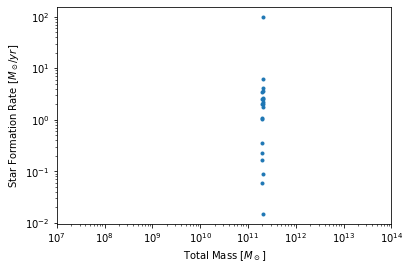

In [68]:
# Now find the subfind and subhalo IDs for some of the most massive halos at z = 0
# You will later use these to load a bunch of merger trees and step back only one step in time
sfr = []
mass_log_msun = []
url_list = []
for j in range(len(subs['results'])):
    print(subs['results'][j]['url'])
    url_list.append(subs['results'][j]['url'])
    sfr.append(subs['results'][j]['sfr'])
    mass_log_msun.append(subs['results'][j]['mass_log_msun'])
    
mass_msun = [x * 1e10 / 0.704 for x in mass_log_msun]

plt.plot(mass_msun,sfr,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')
plt.xlim([10**7,10**14])
plt.show()

In [96]:

for j in range(len(url_list)):
    print( url_list[j])
    sub = get( url_list[j])
    mpb1 = get( sub['trees']['sublink'] )#, fields=fields)
    tree = h5py.File(mpb1, 'r')
    print(tree.keys())
    print('~~~~~~~~~loaded tree~~~~~~~~')
    
    print(numMergers_one_step(tree, 1e-2))
    tree.close()
    STOP


http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/0/


KeyboardInterrupt: 

In [93]:
def partTypeNum(partType):
    """ Mapping between common names and numeric particle types. """
    if str(partType).isdigit():
        return int(partType)
        
    if str(partType).lower() in ['gas','cells']:
        return 0
    if str(partType).lower() in ['dm','darkmatter']:
        return 1
    if str(partType).lower() in ['tracer','tracers','tracermc','trmc']:
        return 3
    if str(partType).lower() in ['star','stars','stellar']:
        return 4 # only those with GFM_StellarFormationTime>0
    if str(partType).lower() in ['wind']:
        return 4 # only those with GFM_StellarFormationTime<0
    if str(partType).lower() in ['bh','bhs','blackhole','blackholes']:
        return 5
    
    raise Exception("Unknown particle type name.")
def maxPastMass(tree, index, plot, partType='stars'):
    """ Get maximum past mass (of the given partType) along the main branch of a subhalo
        specified by index within this tree. """
    ptNum = partTypeNum(partType)
    print('index', index)
    branchSize = tree['MainLeafProgenitorID'][index] - tree['SubhaloID'][index] + 1
    masses = tree['SubhaloMassType'][index: index + branchSize, ptNum]
    ids = tree['SubhaloID'][index: index + branchSize]
    max_mass = np.max(masses)
    index_max = np.where(masses == max_mass)
    
    if plot==True:
        plt.clf()
        plt.plot(tree['SnapNum'][index: index + branchSize],np.log10(tree['SubhaloMass'][index: index + branchSize] * 1e10 / 0.704))
        plt.ylabel('Total Mass [$M_\odot$]')
        plt.show()
    
    return max_mass, ids[index_max]


def numMergers_one_step(tree, minMassRatio, massPartType='stars', index=0):
    """ Calculate the number of mergers in this sub-tree (optionally above some mass ratio threshold). """
    # verify the input sub-tree has the required fields
    
    invMassRatio = 1.0 / minMassRatio

    # walk back main progenitor branch
    rootID = tree['SubhaloID'][index]
    fpID   = tree['FirstProgenitorID'][index]
    
    print('rootID', rootID)
    print('fpID', fpID)

    if fpID != -1:
        fpIndex = index + (fpID - rootID)
        print('fpIndex', fpIndex)

        # explore breadth
        npID = tree['NextProgenitorID'][fpIndex]#was fpIndex
        
        if npID != -1:
            fpMass  = maxPastMass(tree, fpIndex, True, massPartType)
            npIndex = index + (npID - rootID)
            npMass  = maxPastMass(tree, npIndex, True, massPartType)

            # count if both masses are non-zero, and ratio exceeds threshold
            if fpMass > 0.0 and npMass > 0.0:
                ratio = npMass / fpMass

                if ratio >= minMassRatio and ratio <= invMassRatio:
                    
                    return 1, [rootID, fpID, npID], ratio
                    

        else:
            return 0, 0, 0


In [ ]:
for i in range(len(groupcat['files'])):

In [2]:
# I'm guessing that if I want to do this directly, I can simply set the basepath to the actual location
# and then everything's already there!

In [1]:
# Set everything up:
import illustris_python as il
import matplotlib.pyplot as plt
import numpy as np

basePath = '/Users/beckynevin/Illustris/TNG100-1/output'
fields = ['SubhaloMass','SubhaloSFRinRad','SubhaloIDMostbound']
subhalos = il.groupcat.loadSubhalos(basePath,99,fields=fields)
subhalos.keys()

dict_keys(['count', 'SubhaloMass', 'SubhaloSFRinRad', 'SubhaloIDMostbound'])

Text(0, 0.5, 'Star Formation Rate [$M_\\odot / yr$]')

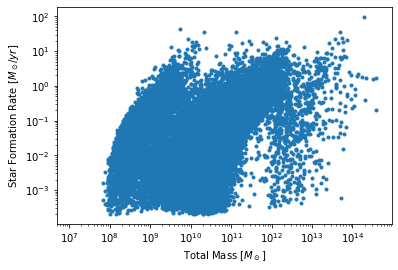

In [2]:
# The group catalogs look like they are useful for various properties at a given snapnum:
# i.e., mass:
mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.704

plt.plot(mass_msun,subhalos['SubhaloSFRinRad'],'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')

In [3]:
# Get the primary subhalo IDs by loading the GroupFirstSub field from FOF:
GroupFirstSub = il.groupcat.loadHalos(basePath,99,fields=['GroupFirstSub'])

In [4]:
# Now get the full merger tree

# mkdir -p ~/Illustris/TNG100-1/postprocessing/trees/SubLink
# cd ~/Illustris/TNG100-1/postprocessing/trees/SubLink/
# wget -nd -nc -nv -e robots=off -l 1 -r -A hdf5 --content-disposition --header="API-Key: 3b865713af85f5da0dba3b577e289484" "http://www.tng-project.org/api/TNG100-1/files/sublink/?format=api"


In [8]:
basePathtree = '/Users/beckynevin/Illustris/TNG100-1'


fields = ['SubhaloID','NextProgenitorID','MainLefProgenitorID','FirstProgenitorID','SubhaloMassType',
          'SubhaloMass','SubfindID','SnapNum']

ratio = 1.0/5.0

# Try to set up a dictionary for snapnumbers:
snaplist = np.arange(0,100)
redshift = np.array([20,15,12,11,10,9.4,9,8.5,8,7.6,
                     7.2,7,6.5,6,5.8,5.5,5.2,5,4.7,4.4,
                     4.2,4,3.7,3.5,3.3,3,2.9,2.7,2.6,2.4,
                     2.3,2.2,2.1,2,1.9,1.8,1.7,1.7,1.6,1.5,
                     1.5,1.4,1.4,1.3,1.3,1.2,1.2,1.1,1.1,1,
                     1,0.96,0.92,0.88,0.85,0.82,0.79,0.76,0.73,0.7,
                     0.67,0.65,0.62,0.6,0.57,0.55,0.53,0.5,0.48,0.46,
                     0.44,0.42,0.4,0.38,0.36,0.35,0.33,0.31,0.3,0.28,
                     0.26,0.24,0.23,0.21,0.2,0.18,0.17,0.15,0.14,0.13,
                     0.11,0.1,0.086,0.073,0.06,0.048,0.035,0.023,0.012,0])



# because subfindID is different than subhalo ID, the offsets allow you to match these
start = 100 # the 101 through 105th most massive primaries
for i in range(start, start+5):
    tree = il.sublink.loadTree(basePath, basePathtree, 99, GroupFirstSub[i], fields = fields, onlyMPB=True)
    #sublink.loadTree uses offset file to go from subhalo ids to the subfind ids :)
    list_snapnum = tree['SnapNum']
    z_list = [redshift[np.where(snaplist, list_snapnum[j])] for j in list_snapnum]
    plt.plot(z_list,tree['SubhaloMass']* 1e10 / 0.704,'-')
    numMergers = il.sublink.numMergers(tree,minMassRatio=ratio)
    print(GroupFirstSub[i], numMergers)
plt.yscale('log')
plt.xlabel('Snapshot Number')
plt.ylabel('Total Subhalo Mass [$M_\odot$]')

tree path trees/SubLink/tree_extended.*.hdf5
putting these together /Users/beckynevin/Illustris/TNG100-1/output SubLink
tree path trees/SubLink/tree_extended.0.hdf5


ValueError: Could not construct treePath from basePath = '/Users/beckynevin/Illustris/TNG100-1/output'

### But, what if I want to search laterally for all things that have merged within the previous snapshot?

This would involve loading the merger trees iteratively for all groupsubhaloes,
and then attempting to see if there is more than one progenitors and finding how many are major mergers.

In [ ]:
# This is the definition of a merger from RG, where if there is a next progenitor then there is a merger. 
# Using this to only walk back one step and see if there was a merger
for i in range(start, start+5):# change this to everything
    tree = il.sublink.loadTree(basePath, 99, GroupFirstSub[i], fields = fields, onlyMPB=True)
    #sublink.loadTree uses offset file to go from subhalo ids to the subfind ids :)
    plt.plot(tree['SnapNum'],tree['SubhaloMass']* 1e10 / 0.704,'-')
    numMergers, Subhalo_ID_array, ratio = il.sublink.numMergers_one_step(tree,minMassRatio=ratio)
    if numMergers != 0:
        print(numMergers, Subhalo_ID_array, ratio)
        STOP
    #return 1, [rootID, fpID, npID], ratio